# Import packages

In [1]:
import pandas as pd
import ml_help
from sklearn.model_selection import train_test_split
plot_label="Speed (km/h)"

# Load data

In [2]:
df = pd.read_csv("./data/yonge_flow_weather_incidents.csv.zip")
df

,currentSpeed,magnitudeOfDelay,length,delay,distance_from_point,visibility,temperature,FeelsLike,humidity,windSpeed,...,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,10.0,2.0,372.91800,199.0,0.001789,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,10.0,0.0,302.76535,0.0,0.112289,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,10.0,0.0,302.76535,0.0,0.112289,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,10.0,0.0,273.82825,0.0,0.127365,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,10.0,0.0,254.24487,0.0,0.112289,10.0,18.69,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94051,10.0,0.0,0.00000,0.0,-1.000000,10.0,9.77,6.07,41.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
94052,13.0,0.0,0.00000,0.0,-1.000000,10.0,9.77,6.07,41.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
94053,18.0,0.0,0.00000,0.0,-1.000000,10.0,9.64,5.90,40.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
94054,13.0,0.0,0.00000,0.0,-1.000000,10.0,9.61,5.86,40.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Split data set into train and test

In [3]:
X = df.drop("currentSpeed",axis=1)
y = df["currentSpeed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

## Sample 50% of remaining training data to run CV.
- The idea is have enough data that is representative of the dataset, while speeding up the CV performed by GridSearchCV.

In [4]:
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Show model metrics to determine what algorithms to run

In [5]:
metrics = pd.read_csv("./metrics/142_initial_metrics.csv.zip")
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,Random Forest,0.657145,1.508342,4.764774,2.182836,1.507824e+13,40.685698,0.401827
1,XGBoost,0.588269,1.800815,5.721965,2.392063,4.000094e+13,0.526766,0.039311
2,MLP,0.470146,2.059823,7.363562,2.713588,6.692566e+13,60.289400,0.019277
3,Decision Tree,0.414761,1.563925,8.133273,2.851889,8.140045e+12,0.643047,0.010785
4,Linear Regression,0.263504,2.565188,10.235337,3.199271,1.505610e+14,0.243864,0.008721
5,Elastic Net,0.167499,2.951749,11.569560,3.401406,1.554239e+14,0.073203,0.006991
6,Lasso,0.111382,3.103075,12.349438,3.514177,1.556248e+14,0.075007,0.007033
7,Logistic Regression,-0.460208,2.855563,20.293020,4.504777,1.570550e+14,5.176189,0.011509


# Run ML tasks

## Random Forest

Testing 243 param combinations for Random Forest. CV=5. Total fits: 1215

Searching space...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Searching space... OK! Took 2471.2214097976685 seconds
Storing best params...
Storing best params... OK
Fitting model...
Fitting model... OK! Took 44.03643727302551 seconds

model Random Forest
r2 0.4760186446663278
mae 2.065215342887192
mse 7.281950604094969
rmse 2.6985089594246245
mape 50158410518715.06
time_to_fit 44.03643727302551
time_to_predict 0.1723918914794922

Dumping model...
Dumping model... OK! Took 0.5541763305664062 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


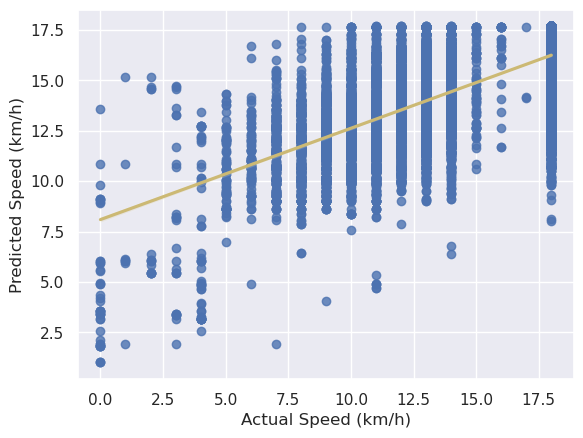

In [6]:
from sklearn.ensemble import RandomForestRegressor

file_name = "143_random_forest"
model_name = "Random Forest"

param_grid = {
    "n_estimators": [100,200,300],
    "max_depth": [16,32,48],
    "max_leaf_nodes": [10,50,100],
    "min_samples_leaf": [1,5,10],
    "min_samples_split": [2,8,16]
}

estimator = RandomForestRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, RandomForestRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## Decision Tree

Testing 750 param combinations for Decision Tree. CV=5. Total fits: 3750

Searching space...
Fitting 5 folds for each of 750 candidates, totalling 3750 fits
Searching space... OK! Took 61.83890438079834 seconds
Storing best params...
Storing best params... OK
Fitting model...
Fitting model... OK! Took 0.3609943389892578 seconds

model Decision Tree
r2 0.4450610592261518
mae 2.1013472856101676
mse 7.712178904592142
rmse 2.777081004326691
mape 47388547005788.28
time_to_fit 0.3609943389892578
time_to_predict 0.007334709167480469

Dumping model...
Dumping model... OK! Took 0.004537105560302734 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


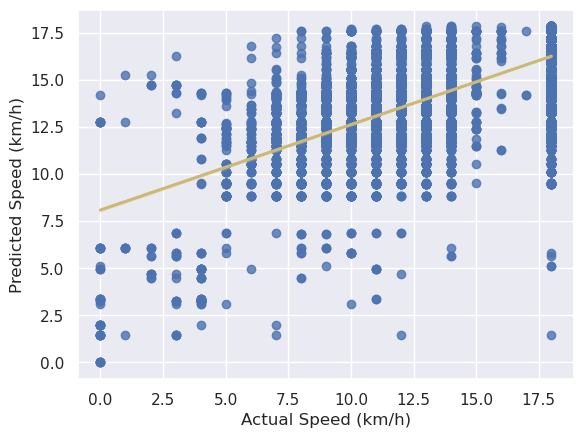

In [7]:
from sklearn.tree import DecisionTreeRegressor

file_name = "143_decision_tree"
model_name = "Decision Tree"

param_grid = {
    "random_state": [42],
    "criterion": ["squared_error"],
    "splitter": ["best"],
    "max_depth": [6,8,16,32,64,128],
    "min_samples_split": [2,4,8,16,32],
    "min_samples_leaf": [1,5,10,15,30],
    "max_leaf_nodes": [10,30,50,75,100]
}

estimator = DecisionTreeRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, DecisionTreeRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## XGBoost

Testing 243 param combinations for XGBoost. CV=5. Total fits: 1215

Searching space...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Searching space... OK! Took 7866.928599834442 seconds
Storing best params...
Storing best params... OK
Fitting model...
Fitting model... OK! Took 8.893544912338257 seconds

model XGBoost
r2 0.6303518667206809
mae 1.6727860466514781
mse 5.137128296715441
rmse 2.266523394257258
mape 27617265544195.996
time_to_fit 8.893544912338257
time_to_predict 0.08788633346557617

Dumping model...
Dumping model... OK! Took 0.544605016708374 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


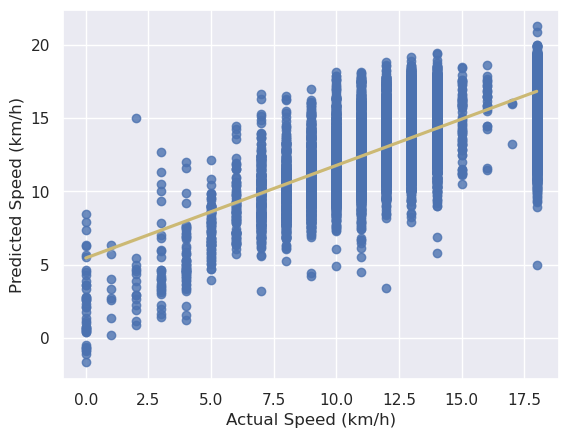

In [8]:
import xgboost as xgb

file_name = "143_xgboost"
model_name = "XGBoost"

param_grid = {
    "random_state": [42],
    "objective": ["reg:squarederror"],
    "tree_method": ["gpu_hist"],
    "predictor": ["gpu_predictor"],
    "num_parallel_tree": [10],
    "max_depth": [6, 8, 16],
    "n_estimators": [100, 250, 350],
    "max_leaves": [20, 40, 80],
    "alpha": [0.01, 0.1, 1],
    "learning_rate": [0.3, 0.5, 0.9]
}

estimator = xgb.XGBRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)
    
model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, xgb.XGBRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## MLP

Testing 216 param combinations for MLP. CV=5. Total fits: 1080

Searching space...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Searching space... OK! Took 1601.6156842708588 seconds
Storing best params...
Storing best params... OK
Fitting model...
Fitting model... OK! Took 126.92754077911377 seconds

model MLP
r2 0.47253330136424243
mae 2.004117757434456
mse 7.330387628629814
rmse 2.7074688601403736
mape 32407961818383.676
time_to_fit 126.92754077911377
time_to_predict 0.03739523887634277

Dumping model...
Dumping model... OK! Took 0.024632692337036133 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


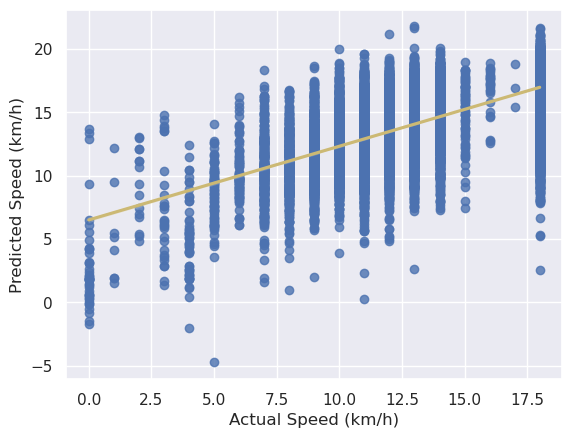

In [9]:
from sklearn.neural_network import MLPRegressor

file_name = "143_mlpr"
model_name = "MLP"

param_grid = {
    "random_state": [42],
    "hidden_layer_sizes": [(100), (100,50), (100,50,25)],
    "alpha": [0.0001, 0.001, 0.1],
    "learning_rate_init": [0.001, 0.1],
    "max_iter": [500, 600, 700],
    "tol": [1e-4],
    "epsilon": [1e-8, 1e-4],
    "n_iter_no_change": [3, 10]
}

estimator = MLPRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, MLPRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train